In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('result_perfect_foresight.csv', parse_dates=['time'], index_col='time')

In [4]:
daily_amounts = df.groupby(pd.Grouper(freq='D'))['power'].agg([('daily_discharge', lambda dispatch: dispatch[dispatch>=0].sum()/2),
                                                               ('daily_charge', lambda dispatch: dispatch[dispatch<0].sum()/2)])

<Axes: xlabel='time'>

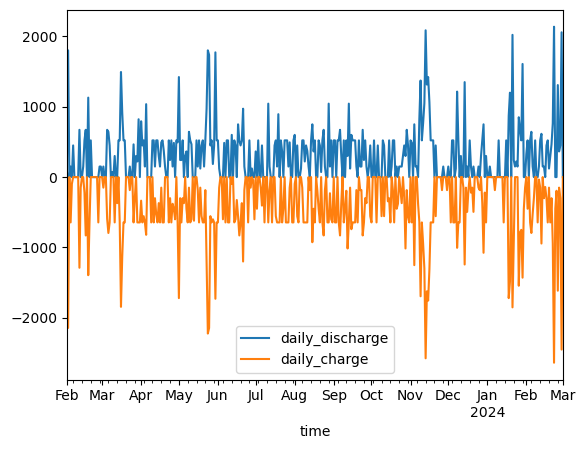

In [5]:
daily_amounts.plot(legend=True)

<Axes: xlabel='time'>

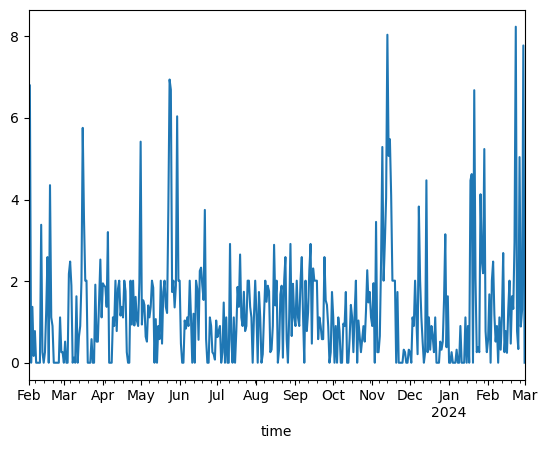

In [6]:
daily_cycles = df.groupby(pd.Grouper(freq='D'))['power'].agg([('daily_discharge', lambda dispatch: dispatch[dispatch>=0].sum()/2),
                                                               ('daily_charge', lambda dispatch: dispatch[dispatch<0].sum()/2),
                                                               ('cycles', lambda dispatch: abs(dispatch).sum()/2/580)])
daily_cycles['cycles'].plot()

In [7]:
discharge_efficiency = 0.9
charge_efficiency = 0.9

top_avg_price = df.groupby(pd.Grouper(freq='D'))['spot_price'].apply(lambda grp: grp.nlargest(4).mean())
bottom_avg_price = df.groupby(pd.Grouper(freq='D'))['spot_price'].apply(lambda grp: grp.nsmallest(4).mean())
daily_price_spread = (top_avg_price * discharge_efficiency) - (bottom_avg_price / charge_efficiency)
daily_price_spread.rename('price_spread', inplace=True)

daily_price_spread

time
2023-02-01      222.252056
2023-02-02     1570.395122
2023-02-03      220.262845
2023-02-04      256.989720
2023-02-05      213.065814
                  ...     
2024-02-26     2939.795081
2024-02-27      224.950716
2024-02-28      295.194752
2024-02-29    14915.847231
2024-03-01      -18.577778
Freq: D, Name: price_spread, Length: 395, dtype: float64

In [8]:
min_and_max_price = df.groupby(pd.Grouper(freq='D'))['spot_price'].agg([('max_price', 'max'), ('min_price', 'min')])

In [9]:
min_and_max_price

,max_price,min_price
time,,
2023-02-01,334.92925,43.18392
2023-02-02,790.41586,-999.99090
2023-02-03,192.01000,-55.00000
2023-02-04,258.56183,-71.57230
2023-02-05,181.64444,-47.93651
...,...,...
2024-02-26,3354.07395,-658.78365
2024-02-27,299.99005,-14.43785
2024-02-28,380.46406,-10.23570


<Axes: xlabel='time'>

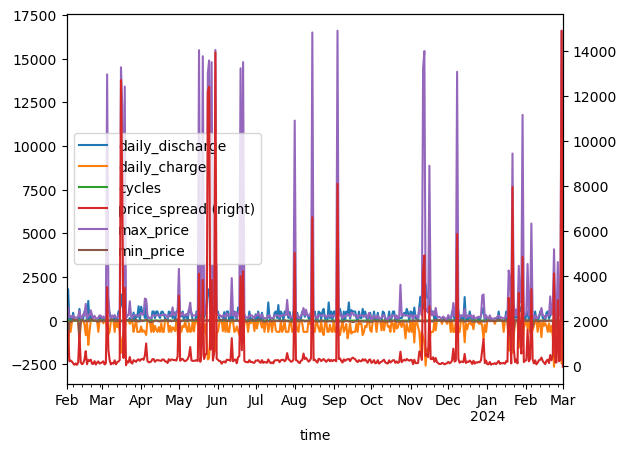

In [10]:
price_vs_cycles = pd.concat([daily_cycles, daily_price_spread, min_and_max_price], axis=1)
price_vs_cycles.plot(secondary_y=['price_spread'], legend=True)

<Axes: xlabel='price_spread', ylabel='cycles'>

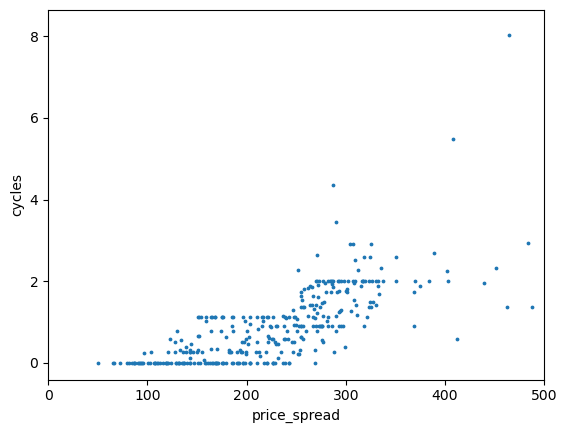

In [23]:
price_vs_cycles[['cycles','price_spread']].plot(x='price_spread', y='cycles', legend=True, kind='scatter', s=3, xlim=(0,500))

In [15]:
price_vs_cycles[price_vs_cycles['cycles']>4]

,daily_discharge,daily_charge,cycles,price_spread,max_price,min_price
time,,,,,,
2023-02-02,1801.5,-2144.444444,6.803352,1570.395122,790.41586,-999.99090
2023-02-18,1129.5,-1394.444444,4.351628,287.239256,299.98000,-40.00000
2023-03-16,1494.0,-1844.444444,5.755939,12721.243195,14506.68625,-35.84433
2023-05-01,1422.0,-1720.370370,5.417880,3136.397555,2964.03805,-908.48763
2023-05-24,1801.5,-2224.074074,6.940645,12205.609590,14141.35061,-17.21442
2023-05-25,1737.0,-2144.444444,6.692146,12424.742829,14892.28221,16.49555
2023-05-30,1773.0,-1729.629630,6.039017,13947.675384,15500.00000,0.22354
2023-11-09,1372.5,-1694.444444,5.287835,645.466300,724.99000,-24.40545
2023-11-12,1050.0,-1296.296296,4.045338,4926.457844,15433.41945,-55.20944


In [24]:
df.groupby(pd.Grouper(freq='Y'))['power'].agg([('annual_discharge', lambda dispatch: dispatch[dispatch>=0].sum()/2),
                                               ('annual_charge', lambda dispatch: dispatch[dispatch<0].sum()/2),
                                               ('cycles', lambda dispatch: abs(dispatch).sum()/2/580)])

,annual_discharge,annual_charge,cycles
time,,,
2023-12-31,106708.342105,-132383.138402,412.226691
2024-12-31,22921.500000,-27653.703704,87.198627


In [34]:
shift_freq = df.index[0] - df.index[1]
df.shift(1, freq=shift_freq)

,spot_price,power,market_dispatch,opening_capacity,cycles,revenue
time,,,,,,
2023-02-01 00:00:00,120.06018,-300.0,-150.0,0.0,0.0,-18172.580222
2023-02-01 00:05:00,127.05018,0.0,0.0,135.0,0.0,0.000000
2023-02-01 00:10:00,125.03820,0.0,0.0,135.0,0.0,0.000000
2023-02-01 00:15:00,128.00011,0.0,0.0,135.0,0.0,0.000000
2023-02-01 00:20:00,120.06007,0.0,0.0,135.0,0.0,0.000000
...,...,...,...,...,...,...
2024-02-29 23:35:00,88.00000,0.0,0.0,0.0,471.6,0.000000
2024-02-29 23:40:00,91.40243,0.0,0.0,0.0,471.6,0.000000
2024-02-29 23:45:00,99.26687,0.0,0.0,0.0,471.6,0.000000


In [33]:
shift_freq

Timedelta('-1 days +23:55:00')